In [1]:
import autograd.numpy as np
from autograd import grad, jacobian

In [11]:
def surf(pos):
    z = np.exp(-pos[0]**2. - pos[1]**2.)
    return np.array([pos[0], pos[1], z])

In [12]:
jac = jacobian(surf)

In [14]:
jac(np.array([2.,2.])).shape

(3, 2)

In [44]:
def volume_form(weights, pos):
    f = lambda x: surf(weights, x)
    jac = jacobian(f)(pos)
    g = np.dot(jac.T, jac)
    print(g)
    return np.sqrt(np.linalg.det(g))
    

In [46]:
volume_form(weights, np.array([0.12, 0.1]))

[[1.0548566  0.04571384]
 [0.04571384 1.03809486]]


1.0454431915187965

In [26]:
def path(coeffs, t, endpoints):
    '''OpenString!
    '''
    order, sz = coeffs.shape
    x = endpoints[:, 0] + t*(endpoints[:, 1] - endpoints[:, 0])
    for k in range(order):
        x = x + coeffs[:, k]*np.sin(2*np.pi*k*t)
    return x

def embed_path(coeffs, endpoints, tvec):
    pt = lambda t: surf(path(coeffs, t, endpoints))
    jac = jacobian(pt)
    ds = 0.
    for t in tvec:
        ds = ds + np.sqrt(np.dot(jac(t).T, jac(t)))
    return ds

In [45]:
coeffs = np.random.randn(2, 10)
endpoints = np.array([[3, 1], [-0.5, -2]])
path(coeffs, 0.5, endpoints)

array([ 2.  , -1.25])

In [46]:
loss = lambda coeffs: embed_path(coeffs, endpoints, np.linspace(0, 1, 50))


In [47]:
loss_grad = grad(loss)

In [48]:
for epoch in range(100):
    coeffs -= 0.001*loss_grad(coeffs)
    if epoch % 10 == 0:
        print('Loss: {}'.format(loss(coeffs)))

Loss: 168.92421182039993
Loss: 126.97015878025019
Loss: 126.57536816604025
Loss: 126.18057761401838
Loss: 125.78578712637477
Loss: 125.39099670758318
Loss: 124.99620636308111
Loss: 124.6014160985616
Loss: 124.20662591942623
Loss: 123.8118358304598


In [49]:
pts = np.zeros((2, 50))
for ind, t in enumerate(np.linspace(0, 1, 50)):
    pts[:, ind] = path(coeffs, t, endpoints)
    

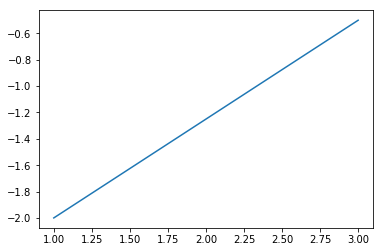

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(pts[0, :], pts[1, :])